<a href="https://colab.research.google.com/github/juDEcorous/Potential-Datasets-for-Machine-Learning/blob/main/Stroke_Data_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> **Stroke**
source: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

## Target:

"Predict whether a patient is likely to get stroke based on the input parameters."

## Data Dictionary :

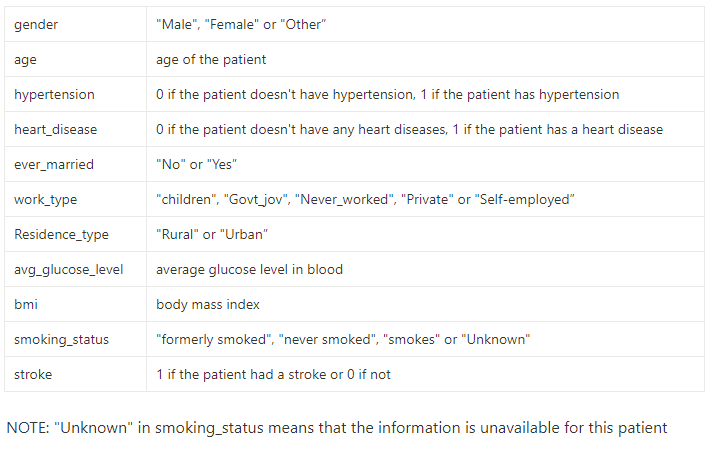

# Imports

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Inspection

I imputed, 'index_col = 0' because 'id' column is an identity number for each patient in our data set.

In [80]:
path = '/content/drive/MyDrive/Datas/project/stroke-data.csv'
stroke = pd.read_csv(path, index_col = 0)
stroke.info()
stroke.sample(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
40702,Female,65.0,0,0,No,Govt_job,Urban,60.70,31.3,never smoked,0
8819,Female,68.0,0,0,Yes,Govt_job,Rural,215.33,27.0,formerly smoked,0
65256,Female,57.0,0,0,Yes,Self-employed,Rural,128.28,34.2,never smoked,0
20370,Female,50.0,0,0,Yes,Self-employed,Rural,103.81,28.3,never smoked,0
41291,Female,46.0,0,0,Yes,Private,Rural,218.65,29.5,never smoked,0


Using the .info method we can already see problems that needed to be address such as missing values under BMI and age being float instead of integer.

### Duplicates

In [81]:
#Check and address duplicates
duplicated = stroke.duplicated().sum()
print(f'We have a total number of {duplicated} duplicates in our data.')

We have a total number of 0 duplicates in our data.


### Missing Values

In [82]:
#Check and address missing values
stroke.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [83]:
missing_percent = ((stroke.isna().sum().sum() / stroke.shape[0])*100).round(2)
print(f'We have a total of {missing_percent}% missing values in our data set.')

We have a total of 3.93% missing values in our data set.


Since we only have a total of 3.93% missing values we will be dropping these rows as less than 5% will not have a big difference when we are predicting our data set. This also prevents me from making more bias.

In [84]:
stroke.dropna(inplace = True)
stroke.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Numerical Columns 
Before the inspection I decided to round the age first as we all know that age should be an interger and not a float. I also respect the decimal values imputed in this data because some patients might be a newborn children, so I round them first before I will convert it to integer.

In [85]:
stroke['age'] = stroke['age'].round()
stroke.age = stroke.age.astype('int')
stroke.age.sample(5)

id
64662    23
69143    45
38143    67
4449     48
49261    54
Name: age, dtype: int64

In [86]:
data_types = stroke.dtypes
int_data = data_types[(data_types == 'int')]

for column in int_data.index:
  print(column)
  print(f'Unique Values: {stroke[column].unique()}\n')

float_data = data_types[(data_types == 'float')]

for column in float_data.index:
  print(column)
  print(f'Unique Values: {stroke[column].unique()}\n')


age
Unique Values: [67 80 49 79 81 74 69 78 61 54 50 64 75 60 71 52 82 65 57 42 48 72 58 76
 39 77 63 73 56 45 70 59 66 43 68 47 53 38 55 46 32 51 14  3  8 37 40 35
 20 44 25 27 23 17 13  4 16 22 30 29 11 21 18 33 24 36  1 34 41  5 26 31
  7 12 62  2  9 15 28 10  0 19  6]

hypertension
Unique Values: [0 1]

heart_disease
Unique Values: [1 0]

stroke
Unique Values: [1 0]

avg_glucose_level
Unique Values: [228.69 105.92 171.23 ...  82.99 166.29  85.28]

bmi
Unique Values: [36.6 32.5 34.4 24.  29.  27.4 22.8 24.2 29.7 36.8 27.3 28.2 30.9 37.5
 25.8 37.8 22.4 48.9 26.6 27.2 23.5 28.3 44.2 25.4 22.2 30.5 26.5 33.7
 23.1 32.  29.9 23.9 28.5 26.4 20.2 33.6 38.6 39.2 27.7 31.4 36.5 33.2
 32.8 40.4 25.3 30.2 47.5 20.3 30.  28.9 28.1 31.1 21.7 27.  24.1 45.9
 44.1 22.9 29.1 32.3 41.1 25.6 29.8 26.3 26.2 29.4 24.4 28.  28.8 34.6
 19.4 30.3 41.5 22.6 56.6 27.1 31.3 31.  31.7 35.8 28.4 20.1 26.7 38.7
 34.9 25.  23.8 21.8 27.5 24.6 32.9 26.1 31.9 34.1 36.9 37.3 45.7 34.2
 23.6 22.3 37.1 45.  25.5 30

In [87]:
stroke.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865553,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.554865,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Looks like we have no impossible values in your numerical.

At first glance, '0' Age may be an impossible values. This data might include neonatal patients (less than 28 days old), these new born babies can also experience stroke.

source: </br>
https://www.childrenshospital.org/conditions/neonatal-stroke#:~:text=What%20is%20neonatal%20stroke%3F,strokes%20even%20occur%20before%20birth.

Another factor that looks questionable is the maximum number in avg_glucose_level column.  Max of 271.74 looks like an impossible value but while reading an article on healthline, it looks like there are also cases where people get 300 mg/dL glucose level or even more. 

source:</br>
https://www.healthline.com/health/diabetes/how-to-lower-blood-sugar-quickly-emergency#:~:text=DKA%20or%20HHS.-,When%20to%20see%20a%20doctor,symptoms%20of%20high%20blood%20sugar.

## Categorical Columns

In [88]:
obj_data = data_types[(data_types == 'object')]

for column in obj_data.index:
  print(column)
  print(f'Unique Values: {stroke[column].unique()}\n')

gender
Unique Values: ['Male' 'Female' 'Other']

ever_married
Unique Values: ['Yes' 'No']

work_type
Unique Values: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']

Residence_type
Unique Values: ['Urban' 'Rural']

smoking_status
Unique Values: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']



On Categorical columns, we need to investigate the 'Other' in gender column as well as the 'Unknown' values in smoking status (we need to know why unknown means that the information is not available for the patient).

### Gender Column

In [89]:
stroke.loc[stroke.gender == 'Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
56156,Other,26,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


Since we only have 1 sample with 'Other' on gender, I decided to just drop the column. After dropping we need to double check.

In [90]:
stroke.drop(56156, inplace = True)
stroke.loc[stroke.gender == 'Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,


### Smoking Status Column

In [91]:
unknown = stroke.loc[stroke.smoking_status == 'Unknown']
unknown

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
60491,Female,78,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
64778,Male,82,0,1,Yes,Private,Rural,208.30,32.5,Unknown,1
33879,Male,42,0,0,Yes,Private,Rural,83.41,25.4,Unknown,1
47306,Male,58,0,0,No,Private,Rural,92.62,32.0,Unknown,1
72366,Male,76,0,0,Yes,Private,Urban,104.47,20.3,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
579,Male,9,0,0,No,children,Urban,71.88,17.5,Unknown,0
36901,Female,45,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
22127,Female,18,0,0,No,Private,Urban,82.85,46.9,Unknown,0


In [92]:
stroke.smoking_status.value_counts(normalize = True)*100

never smoked       37.734311
Unknown            30.215974
formerly smoked    17.033415
smokes             15.016300
Name: smoking_status, dtype: float64

We got quite high percentage of patients with Unknown smoking status. I cannot drop the rows with 'Unknown' values. I could consider dropping the column. However, smoking is a risk factor of having stroke, for this reason I decided to just keep it as is. 

## Data type

Checking data types

In [93]:
stroke.dtypes

gender                object
age                    int64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

# Exploration Data Analysis

In [95]:
numerical_columns = list(stroke.select_dtypes(include='number'))
categorical_columns = list(stroke.select_dtypes(include='object'))

## Numerical EDA

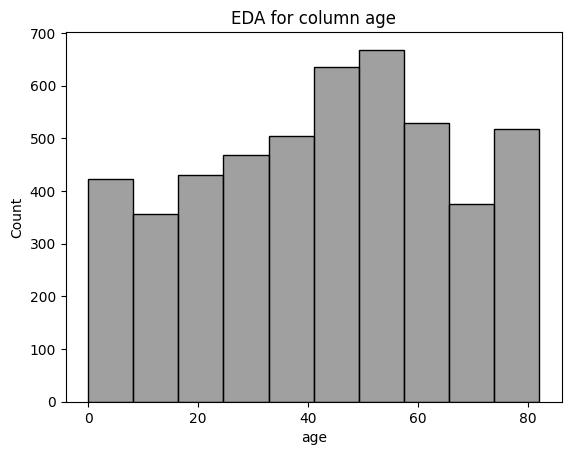

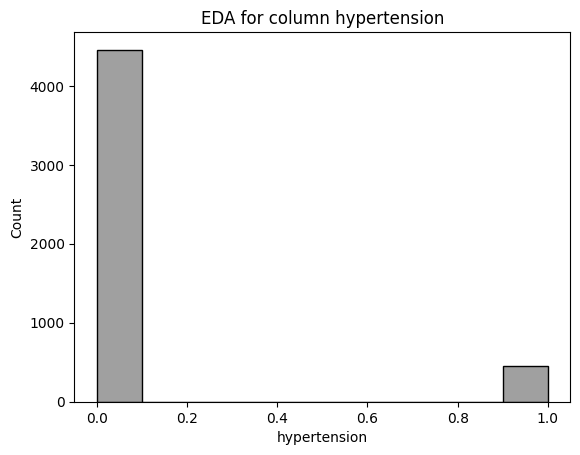

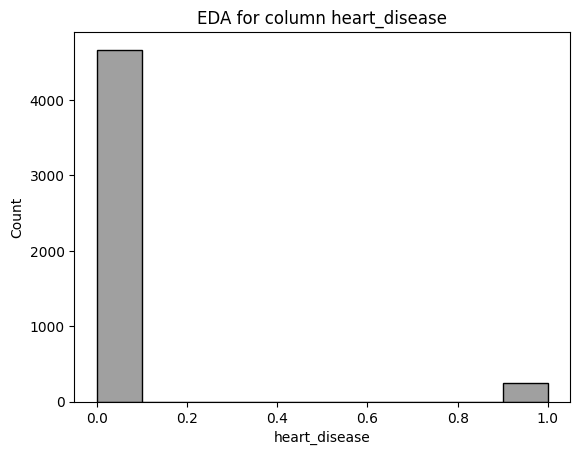

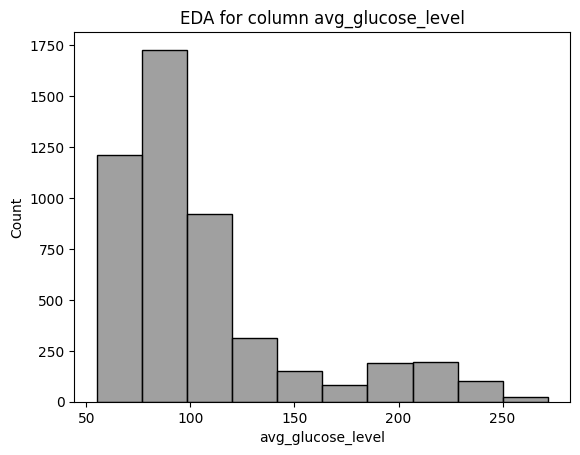

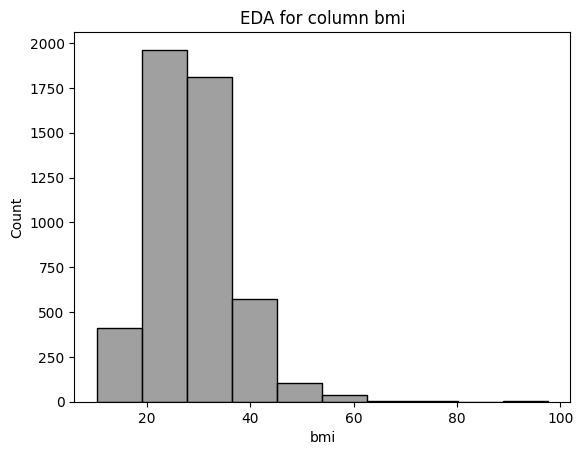

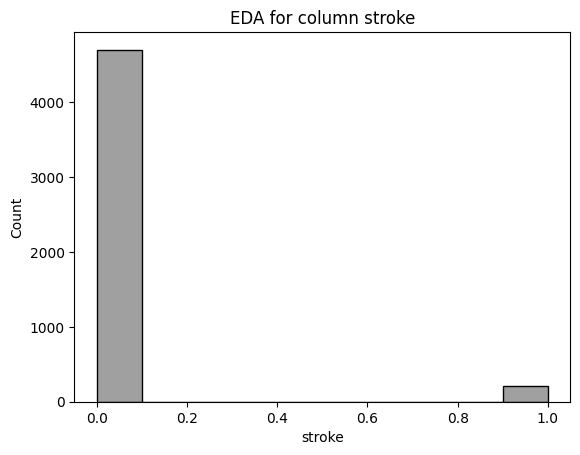

In [103]:
for column in numerical_columns:

  column_name = column
  
  plot = sns.histplot(data = stroke, x = column, bins = 10, 
                      color='grey')
  plot.set_title('EDA for column ' + column_name)
  
  plt.show()

## Categorical EDA

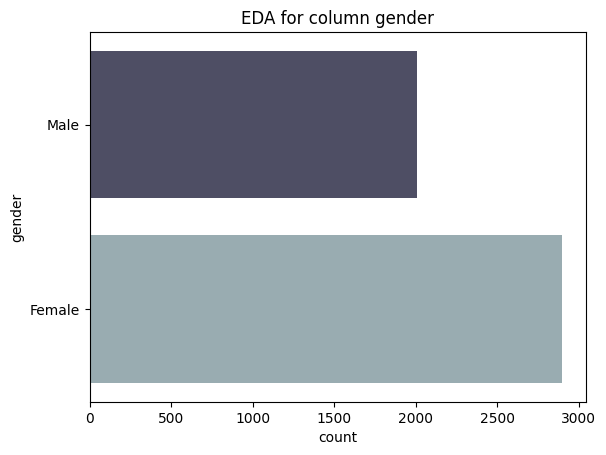

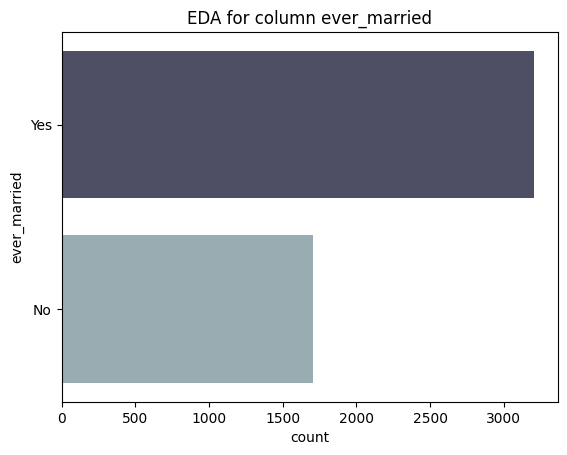

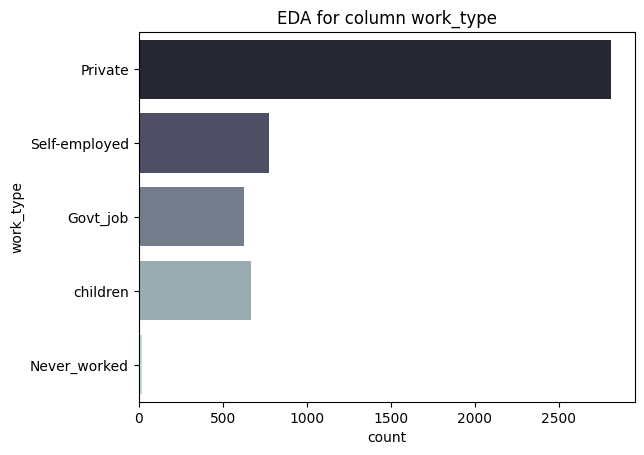

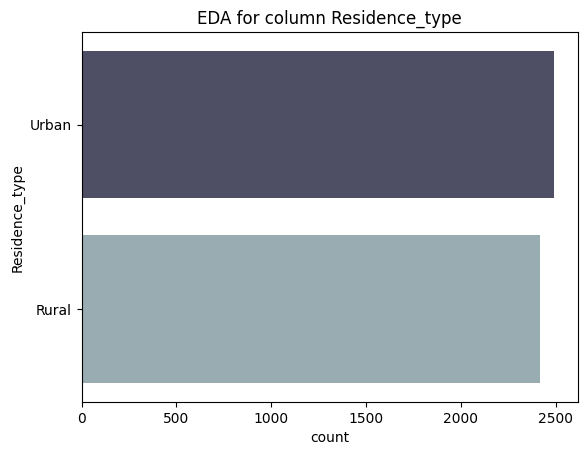

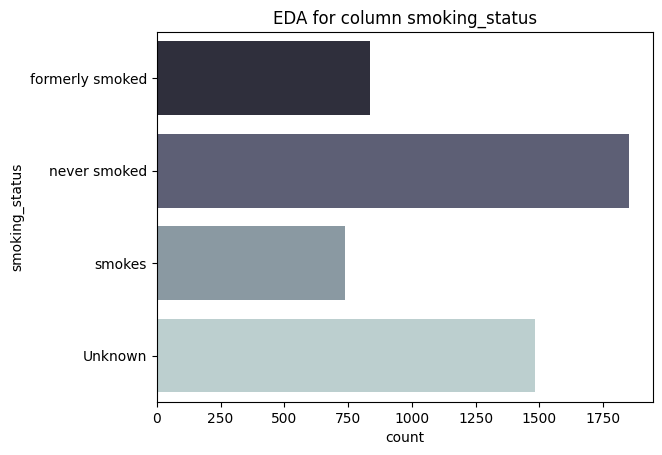

In [101]:
for column in categorical_columns:

  column_name = column
  
  plot = sns.countplot(data = stroke, y = column, palette='bone')
  plot.set_title('EDA for column ' + column_name)
  
  plt.show()

  print('\n\n')

# Machine Learning

Since we are predicting wheather the patient will develope stroke or not. We are going to use Classification Metrix.